In [392]:
#importing the relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline

In [393]:
#importing the database
data = pd.read_csv("RNA_Database.csv")
data.head(10)

,Number_of_Motifs,Clashes,Geometry,Density
0,1,21.14,28.57,0.0
1,5,0.00,0.00,0.0
2,10,3.22,1.85,3.7
3,1,0.00,19.15,0.0
4,639,0.00,19.15,0.0
5,2,2.88,8.57,0.0
6,1,4.88,0.00,0.0
7,572,0.00,29.45,0.0
8,1,10.04,11.11,0.0
9,1,12.06,22.22,0.0


In [394]:
data.shape

(4645, 4)

In [395]:
data.dtypes

Number_of_Motifs      int64
Clashes             float64
Geometry            float64
Density             float64
dtype: object

In [396]:
data.isnull().sum()

Number_of_Motifs    0
Clashes             0
Geometry            0
Density             0
dtype: int64

In [397]:
data.columns

Index(['Number_of_Motifs', 'Clashes', 'Geometry', 'Density'], dtype='object')

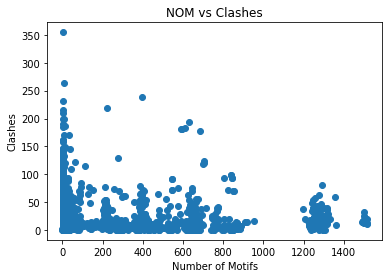

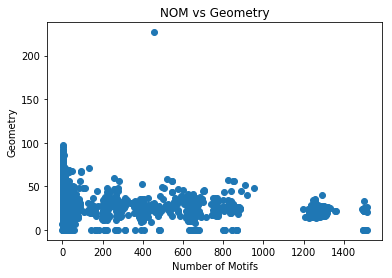

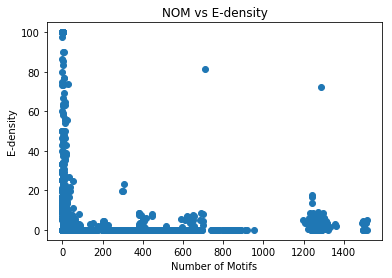

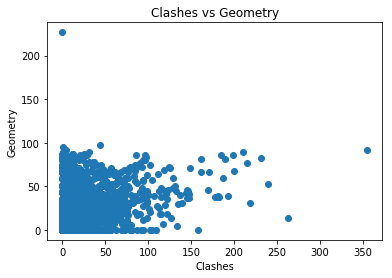

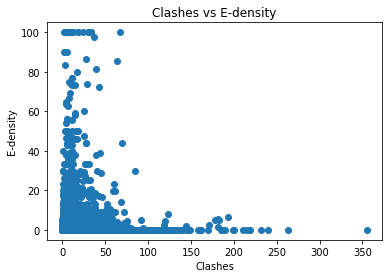

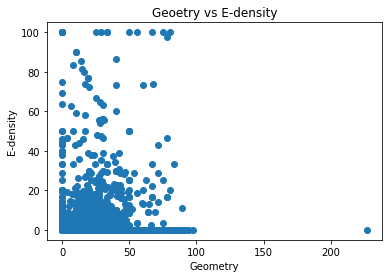

In [398]:
#plt.figure(figsize=(7,7))
plt.scatter(data["Number_of_Motifs"],data["Clashes"])
plt.xlabel("Number of Motifs")
plt.ylabel("Clashes")
plt.title("NOM vs Clashes")
plt.show()

#plt.figure(figsize=(7,7))
plt.scatter(data["Number_of_Motifs"],data["Geometry"])
plt.xlabel("Number of Motifs")
plt.ylabel("Geometry")
plt.title("NOM vs Geometry")
plt.show()

#plt.figure(figsize=(7,7))
plt.scatter(data["Number_of_Motifs"],data["Density"])
plt.xlabel("Number of Motifs")
plt.ylabel("E-density")
plt.title("NOM vs E-density")
plt.show()

#plt.figure(figsize=(7,7))
plt.scatter(data["Clashes"],data["Geometry"])
plt.xlabel("Clashes")
plt.ylabel("Geometry")
plt.title("Clashes vs Geometry")
plt.show()

#plt.figure(figsize=(7,7))
plt.scatter(data["Clashes"],data["Density"])
plt.xlabel("Clashes")
plt.ylabel("E-density")
plt.title("Clashes vs E-density")
plt.show()

#plt.figure(figsize=(7,7))
plt.scatter(data["Geometry"],data["Density"])
plt.xlabel("Geometry")
plt.ylabel("E-density")
plt.title("Geoetry vs E-density")
plt.show()

In [399]:
km = KMeans(n_clusters = 20)
xfeatures = data[['Number_of_Motifs','Clashes']]
clusters = km.fit_predict(xfeatures)

In [400]:
km.labels_

array([13,  0,  0, ...,  5,  0,  0], dtype=int32)

In [401]:
clusters

array([13,  0,  0, ...,  5,  0,  0], dtype=int32)

In [402]:
clusters in km.labels_

True

In [403]:
km.cluster_centers_

array([[   3.74823861,    5.06905589],
       [ 770.        ,   14.5405    ],
       [1297.85      ,   19.05      ],
       [ 281.59701493,   13.66940299],
       [ 644.6       ,   11.57531707],
       [   6.93004115,   55.19460905],
       [ 385.62857143,   28.35385714],
       [ 148.57692308,   16.57461538],
       [1501.39285714,   15.8175    ],
       [ 516.95833333,   19.94958333],
       [ 855.44230769,   15.98615385],
       [   7.79220779,  110.2374026 ],
       [ 214.7251462 ,   18.06292398],
       [   4.93639053,   23.17371302],
       [  59.95      ,   19.19366667],
       [1248.94444444,   19.59911111],
       [ 651.125     ,  159.7925    ],
       [  22.47706422,    8.1416055 ],
       [ 418.07462687,    8.81686567],
       [   7.5       ,  214.6275    ]])

In [404]:
data['groups'] = clusters
data.head(20)

,Number_of_Motifs,Clashes,Geometry,Density,groups
0,1,21.14,28.57,0.0,13
1,5,0.00,0.00,0.0,0
2,10,3.22,1.85,3.7,0
3,1,0.00,19.15,0.0,0
4,639,0.00,19.15,0.0,4
5,2,2.88,8.57,0.0,0
6,1,4.88,0.00,0.0,0
7,572,0.00,29.45,0.0,9
8,1,10.04,11.11,0.0,0
9,1,12.06,22.22,0.0,0


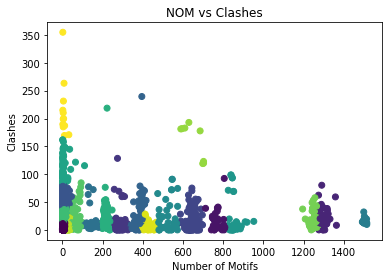

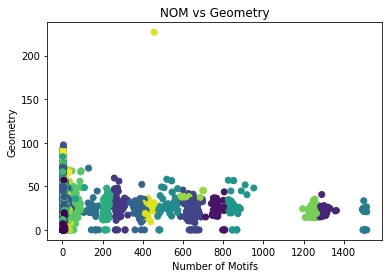

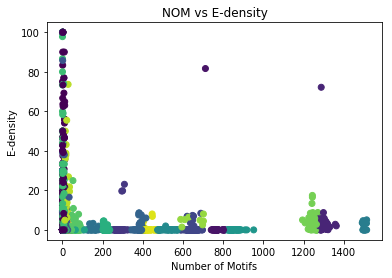

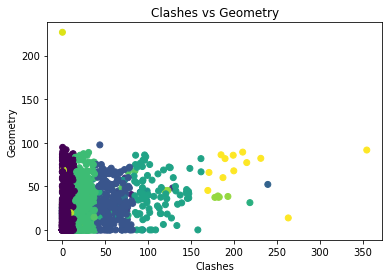

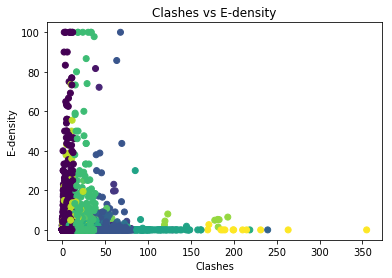

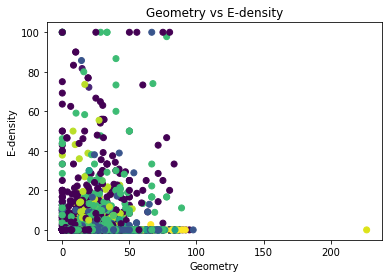

In [405]:
#plt.figure(figsize=(20,10))
plt.scatter(data['Number_of_Motifs'],data['Clashes'],c=data['groups'])
plt.xlabel("Number of Motifs")
plt.ylabel("Clashes")
plt.title("NOM vs Clashes")
plt.show()

plt.scatter(data['Number_of_Motifs'],data['Geometry'],c=data['groups'])
plt.xlabel("Number of Motifs")
plt.ylabel("Geometry")
plt.title("NOM vs Geometry")
plt.show()

plt.scatter(data['Number_of_Motifs'],data['Density'],c=data['groups'])
plt.xlabel("Number of Motifs")
plt.ylabel("E-density")
plt.title("NOM vs E-density")
plt.show()

plt.scatter(data['Clashes'],data['Geometry'],c=data['groups'])
plt.xlabel("Clashes")
plt.ylabel("Geometry")
plt.title("Clashes vs Geometry")
plt.show()

plt.scatter(data['Clashes'],data['Density'],c=data['groups'])
plt.xlabel("Clashes")
plt.ylabel("E-density")
plt.title("Clashes vs E-density")
plt.show()

plt.scatter(data['Geometry'],data['Density'],c=data['groups'])
plt.xlabel("Geometry")
plt.ylabel("E-density")
plt.title("Geometry vs E-density")
plt.show()

In [406]:
cluster_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11,
                'M':12, 'N':13, 'O':14, 'Q':15, 'R':16, 'S':17, 'T':18, 'U':19}

In [407]:
#printing out the 1st cluster
#data[data['groups']==0]

In [408]:
#printing out second cluster
#data[data['groups']==1]

In [409]:
#printing out third cluster
#data[data['groups']==2]

In [410]:
#printing out fourth cluster
#data[data['groups']==3]

In [411]:
#printing out fifth cluster
#data[data['groups']==4]

In [412]:
#printing out sixth cluster
#data[data['groups']==5]

In [413]:
#printing out seventh cluster
#data[data['groups']==6]

In [414]:
#printing out eigth cluster
#data[data['groups']==7]

In [415]:
#printing out ninth cluster
#data[data['groups']==8]

In [416]:
#printing out tenth cluster
#data[data['groups']==9]

In [417]:
#printing out eleventh cluster
#data[data['groups']==10]

In [418]:
#printing out twelfth cluster
#data[data['groups']==11]

In [419]:
#printing out thirteenth cluster
#data[data['groups']==12]

In [420]:
#printing out fourteenth cluster
#data[data['groups']==13]

In [421]:
#printing out fifteenth cluster
#data[data['groups']==14]

In [422]:
#printing out sixteenth cluster
#data[data['groups']==15]

In [423]:
#printing out seventeenth cluster
#data[data['groups']==16]

In [424]:
#printing out eighteenth cluster
#data[data['groups']==17]

In [425]:
#printing out nineteenth cluster
#data[data['groups']==18]

In [426]:
#printing out twentieth cluster
#data[data['groups']==19]

In [427]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(xfeatures)
x_scaled

/home/satyam/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/satyam/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.44003438,  0.22409917],
       [-0.42718361, -0.66879396],
       [-0.41112015, -0.53279037],
       ...,
       [-0.41433284,  1.46333684],
       [-0.41433284, -0.40016575],
       [-0.44324707, -0.66879396]])

In [428]:
xfeatures

,Number_of_Motifs,Clashes
0,1,21.14
1,5,0.00
2,10,3.22
3,1,0.00
4,639,0.00
5,2,2.88
6,1,4.88
7,572,0.00
8,1,10.04
9,1,12.06


In [429]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 223.75894264903872
2 : 91.14488613215237
3 : 53.18696009320788
4 : 37.74110556260701
5 : 32.909430952754576
6 : 29.446793351620048
7 : 27.778976142693214
8 : 24.57974274929698
9 : 22.31732419750632
10 : 21.379290776496497
11 : 20.53265478308923
12 : 19.99171386522085
13 : 18.44114657804389
14 : 17.89678929150071
15 : 17.02337298864752
16 : 16.52389610654227
17 : 16.295553203640658
18 : 15.822485802200514
19 : 15.409041046377933


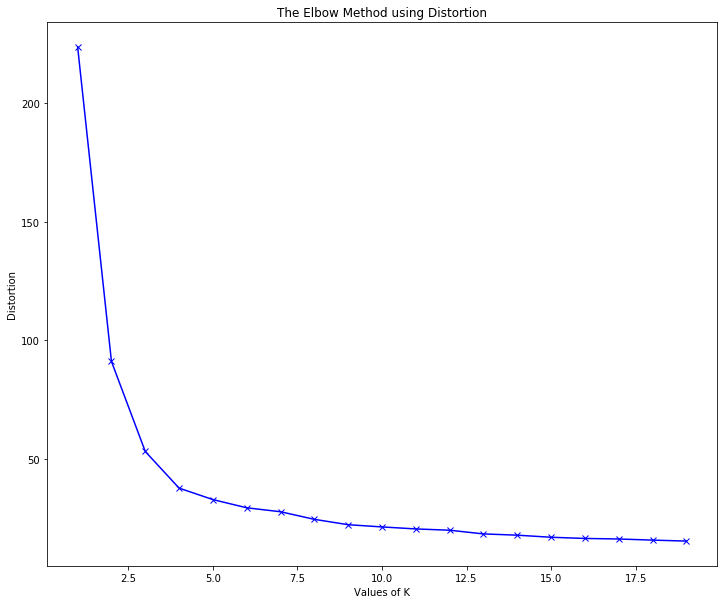

In [430]:
plt.figure(figsize=(12,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [431]:
km2 = KMeans(n_clusters = 4)
new_clusters = km2.fit_predict(x_scaled)
data_scaled = data
data_scaled['cluster'] = new_clusters
data_scaled

,Number_of_Motifs,Clashes,Geometry,Density,groups,cluster
0,1,21.14,28.57,0.00,13,1
1,5,0.00,0.00,0.00,0,1
2,10,3.22,1.85,3.70,0,1
3,1,0.00,19.15,0.00,0,1
4,639,0.00,19.15,0.00,4,2
5,2,2.88,8.57,0.00,0,1
6,1,4.88,0.00,0.00,0,1
7,572,0.00,29.45,0.00,9,2
8,1,10.04,11.11,0.00,0,1
9,1,12.06,22.22,0.00,0,1


In [432]:
#listing out the updated 1st cluster
#data[data['cluster']==0]

In [433]:
#listing out the updated 2nd cluster
#data[data['cluster']==1]

In [434]:
#listing out the updated 3rd cluster
#data[data['cluster']==2]

In [435]:
#listing out the updated 4th cluster
#data[data['cluster']==3]

In [436]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
# from sklearn.decomposition import PCA
# reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
# results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
# plt.title('K-means Clustering with 2 dimensions')
# plt.show()

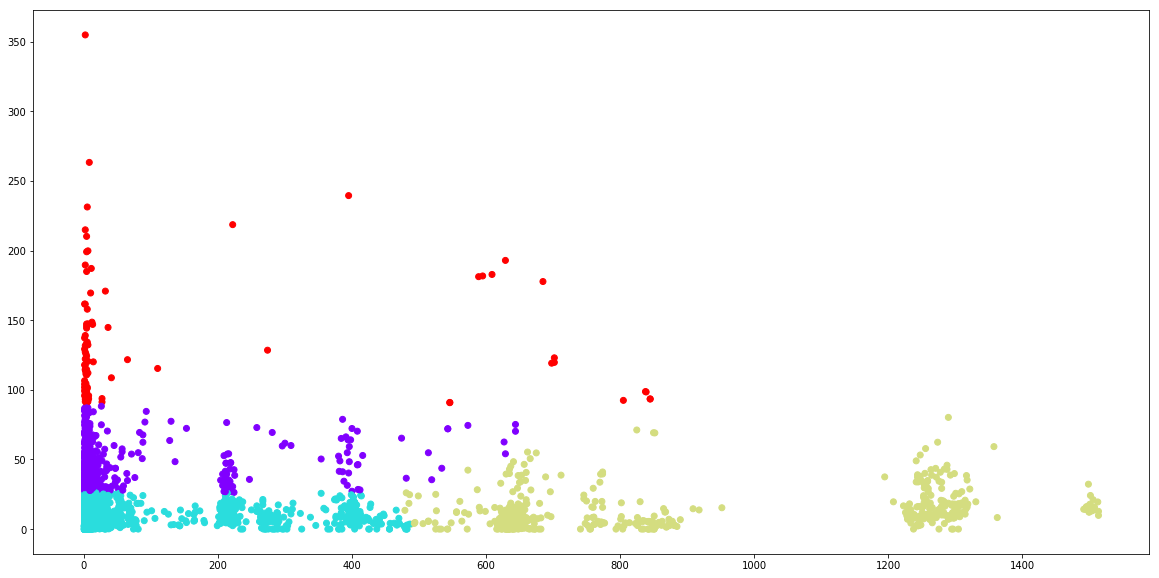

In [438]:
# Plot of our clusters
plt.figure(figsize=(20,10))
plt.scatter(data['Number_of_Motifs'],data['Clashes'],c=data['cluster'],cmap='rainbow')
plt.show()

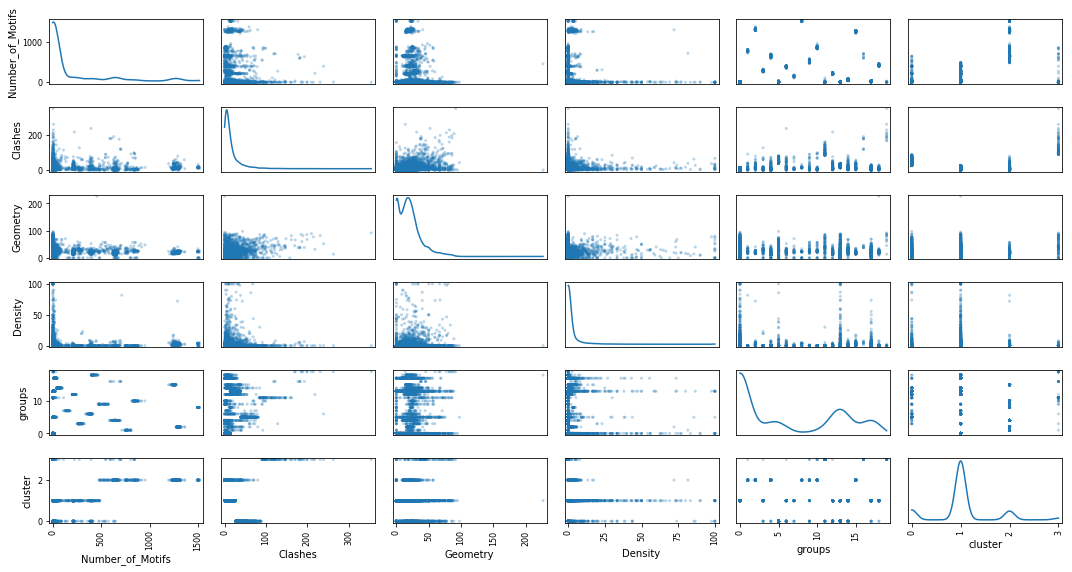

In [439]:
pd.plotting.scatter_matrix(data, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout() # To avoid overlapping of plots